# Zbiór danych v1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from utils import load_jsonl

In [2]:
DATA_DIR = '../data/v1/'

In [3]:
artists_df = load_jsonl(DATA_DIR + 'artists.jsonl')
tracks_df = load_jsonl(DATA_DIR + 'tracks.jsonl')
users_df = load_jsonl(DATA_DIR + 'users.jsonl')
sessions_df = load_jsonl(DATA_DIR + 'sessions.jsonl')
track_storage_df = load_jsonl(DATA_DIR + 'track_storage.jsonl')

## Tabela artists

In [4]:
artists_df.head()

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,5wJ1H6ud777odtZl5gG507,Vishal Mishra,"[desi pop, modern bollywood]"
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."


In [5]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27650 entries, 0 to 27649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27650 non-null  object
 1   name    27650 non-null  object
 2   genres  26310 non-null  object
dtypes: object(3)
memory usage: 648.2+ KB


### Brakujące wartości

In [6]:
artists_df.isnull().sum()

id           0
name         0
genres    1340
dtype: int64

Atrybut genres ma 1340 pustych wartości.

## Tabela sessions

In [7]:
sessions_df.head()

,timestamp,user_id,track_id,event_type,session_id
0,2023-01-13T21:54:21,101.0,0Z4ABgkKUGXmVwOx7WMWJu,play,124
1,2023-01-13T21:55:34.303000,101.0,0Z4ABgkKUGXmVwOx7WMWJu,like,124
2,2023-01-13T22:00:39.907000,NaN,3oh1YM9W9mcyBUah2wLfkT,play,124
3,2023-01-13T22:04:36.187000,101.0,,advertisement,124
4,2023-01-13T22:04:49.187000,101.0,,buy_premium,124


In [8]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   3807 non-null   object 
 1   user_id     3602 non-null   float64
 2   track_id    3612 non-null   object 
 3   event_type  3619 non-null   object 
 4   session_id  3807 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 148.8+ KB


### Brakujące wartości

In [9]:
sessions_df.isnull().sum()

timestamp       0
user_id       205
track_id      195
event_type    188
session_id      0
dtype: int64

In [10]:
sessions_df['event_type'].unique()

array(['play', 'like', 'advertisement', 'buy_premium', 'skip', None],
      dtype=object)

In [11]:
null_counts_play_event_type = sessions_df[(sessions_df['event_type'] == 'play') & (sessions_df['track_id'].isnull())]
null_counts_like_event_type = sessions_df[(sessions_df['event_type'] == 'like') & (sessions_df['track_id'].isnull())]
null_counts_skip_event_type = sessions_df[(sessions_df['event_type'] == 'skip') & (sessions_df['track_id'].isnull())]
not_null_counts_buy_premium_event_typ = sessions_df[(sessions_df['event_type'] == 'buy_premium') & (sessions_df['track_id'].isnull())]
not_null_counts_advertisement_event_type = sessions_df[(sessions_df['event_type'] == 'advertisement') & (sessions_df['track_id'].isnull())]

print("Liczba nulli w kolumnie track_id dla event_type 'play':", len(null_counts_play_event_type['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'like':", len(null_counts_like_event_type['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'skip':", len(null_counts_skip_event_type['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'buy_premium':", len(not_null_counts_buy_premium_event_typ['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'advertisement':", len(not_null_counts_advertisement_event_type['track_id']))

Liczba nulli w kolumnie track_id dla event_type 'play': 119
Liczba nulli w kolumnie track_id dla event_type 'like': 28
Liczba nulli w kolumnie track_id dla event_type 'skip': 37
Liczba nulli w kolumnie track_id dla event_type 'buy_premium': 2
Liczba nulli w kolumnie track_id dla event_type 'advertisement': 1


Powyższe wyniki świadczą o istnieniu wielu wierszy, które są blędne. Na przykład brak id odtworzonej/polubionej/pominiętej piosenki.

### Rozkład atrybutów

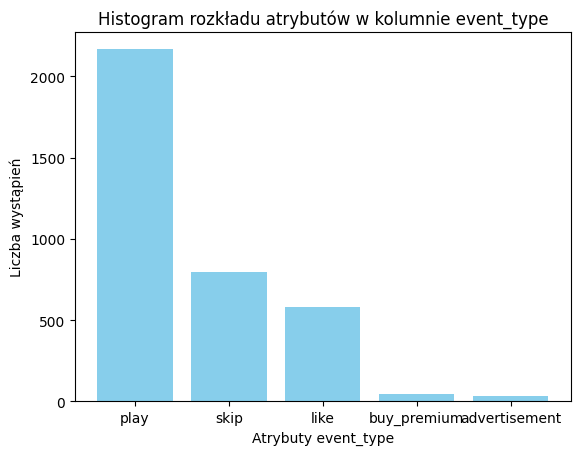

In [12]:
# Rozkład atrybutów w kolumnie event_type
event_type_distribution = sessions_df['event_type'].value_counts()

# Tworzenie histogramu
plt.bar(event_type_distribution.index, event_type_distribution.values, color='skyblue')
plt.title('Histogram rozkładu atrybutów w kolumnie event_type')
plt.xlabel('Atrybuty event_type')
plt.ylabel('Liczba wystąpień')
plt.show()

## Tabela track_storage

In [13]:
track_storage_df.head()

,track_id,storage_class,daily_cost
0,6C0WWu7RYKbAgWUI3YC0sT,slow,0.012479
1,4q7EBRq8ncztC2PRmEC7Fy,slow,0.012737
2,7cNyONpVADZVrW9xe3qq4z,slow,0.013967
3,1bKRTzTFz7wHMxpgZSuPR1,slow,0.009685
4,56OEjuyZ3AROnv4aR1XqhD,slow,0.009106


In [14]:
track_storage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   track_id       129648 non-null  object 
 1   storage_class  129648 non-null  object 
 2   daily_cost     129648 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


### Brakujące wartości

In [15]:
track_storage_df.isnull().sum()

track_id         0
storage_class    0
daily_cost       0
dtype: int64

### Rozkład atrybutów

<Axes: >

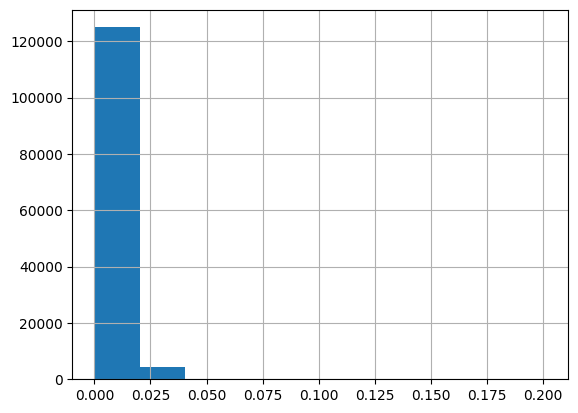

In [16]:
track_storage_df['daily_cost'].hist()

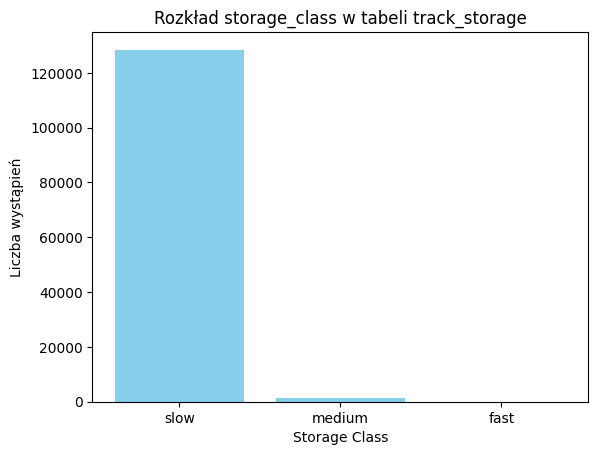

In [17]:
# Rozkład atrybutów w kolumnie storage_class
storage_class_distribution = track_storage_df['storage_class'].value_counts()

# Tworzenie wykresu słupkowego
plt.bar(storage_class_distribution.index, storage_class_distribution.values, color='skyblue')
plt.title('Rozkład storage_class w tabeli track_storage')
plt.xlabel('Storage Class')
plt.ylabel('Liczba wystąpień')
plt.show()

In [18]:
track_storage_df['storage_class'].value_counts()

storage_class
slow      128433
medium      1208
fast           7
Name: count, dtype: int64

Atrybut storage_class jest bardzo niezrównoważony.

## Tabela tracks

In [19]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40.0,249573,1,7u710e44HW3K7A5eTnRqHC,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.119,0.633,97.865,4
1,4q7EBRq8ncztC2PRmEC7Fy,My Love - Live / Remastered,34.0,254733,0,3sFhA6G1N0gG1pszb6kk1m,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.956,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45.0,279347,0,7IAXZaLTb6nkJr8RmVPn5y,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.128,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6.0,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.172,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19.0,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.241,0.317,100.041,4


In [20]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                123262 non-null  object 
 1   name              123133 non-null  object 
 2   popularity        123162 non-null  float64
 3   duration_ms       129648 non-null  int64  
 4   explicit          129648 non-null  int64  
 5   id_artist         123164 non-null  object 
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  mode              25929 non-null   float64
 11  loudness          129648 non-null  float64
 12  speechiness       129648 non-null  float64
 13  acousticness      129648 non-null  float64
 14  instrumentalness  129648 non-null  float64
 15  liveness          129648 non-null  float64
 16  valence           12

### Brakujące wartości

In [21]:
tracks_df.isnull().sum()

id                    6386
name                  6515
popularity            6486
duration_ms              0
explicit                 0
id_artist             6484
release_date             0
danceability             0
energy                   0
key                      0
mode                103719
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

### Rozkład atrybutów

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

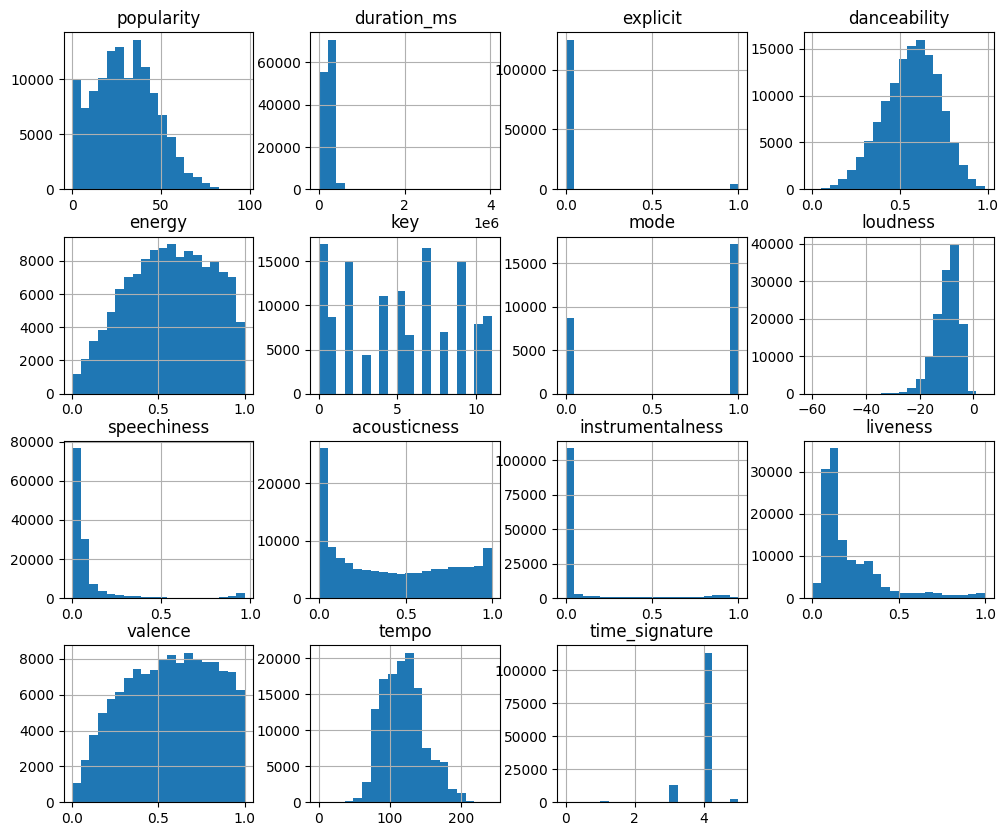

In [22]:
tracks_df.hist(figsize=(12, 10), bins=20)

## Tabela users

In [23]:
users_df.head()

,user_id,name,city,street,favourite_genres,premium_user,id
0,101,Ewa Ochnik,Szczecin,aleja Osiedlowa 927,"[mpb, roots rock, pop]",True,NaN
1,102,Artur Jędryczka,Szczecin,al. Grzybowa 02/40,"[permanent wave, dance pop, regional mexican]",True,NaN
2,103,Tola Żach,Radom,al. Żytnia 11/47,"[regional mexican, new wave pop, c-pop]",True,-1.0
3,104,Leonard Łyś,Poznań,aleja Sowia 88/38,"[europop, roots rock, mellow gold]",True,NaN
4,105,Ignacy Adamiuk,Gdynia,plac Jeziorna 87/33,"[mpb, argentine rock, alternative rock]",True,NaN


In [24]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           50 non-null     int64  
 1   name              50 non-null     object 
 2   city              50 non-null     object 
 3   street            50 non-null     object 
 4   favourite_genres  47 non-null     object 
 5   premium_user      46 non-null     object 
 6   id                2 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


Tabela users posiada tylko 50 rekordów. Trudno na jej podstawie wyciągnąć wnioski dotyczące rozkładu jej atrybutów i braakujących wartości. 

## Ogólne wnioski
* mamy mało danych o użytkownikach i sesjach
* dane sesji mają wiele błędów logicznych
* dane posiadają wiele braków